<a href="https://colab.research.google.com/github/AjayAajhey/assignments10-16/blob/main/Task7KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score 
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
files.upload()

Saving testKNN (1).txt to testKNN (1) (1).txt
Saving trainKNN (1).txt to trainKNN (1) (2).txt


{'testKNN (1).txt': b'68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17,1\n69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1\n70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1\n144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2\n145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2\n146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2\n161,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,3\n162,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3\n163,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3\n174,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5\n175,1.52058,12.85,1.61,2.17,72.18,0.76,9.70,0.24,0.51,5\n176,1.52119,12.97,0.33,1.51,73.39,0.13,11.27,0.00,0.28,5\n183,1.51916,14.15,0.00,2.09,72.74,0.00,10.88,0.00,0.00,6\n184,1.51969,14.56,0.00,0.56,73.48,0.00,11.22,0.00,0.00,6\n185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6\n212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7\n213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7\n214,1.5

In [ ]:
train=pd.read_csv("/content/trainKNN (1).txt",sep=",",header=None,
                       names=["Number","oxide1","oxide2","oxide3","oxide4","oxide5","oxide6","oxide7","oxide8","oxide9","class"])
train.head()

,Number,oxide1,oxide2,oxide3,oxide4,oxide5,oxide6,oxide7,oxide8,oxide9,class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
train.drop(columns=["Number"],inplace=True)

In [ ]:
train.head()

,oxide1,oxide2,oxide3,oxide4,oxide5,oxide6,oxide7,oxide8,oxide9,class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   oxide1  196 non-null    float64
 1   oxide2  196 non-null    float64
 2   oxide3  196 non-null    float64
 3   oxide4  196 non-null    float64
 4   oxide5  196 non-null    float64
 5   oxide6  196 non-null    float64
 6   oxide7  196 non-null    float64
 7   oxide8  196 non-null    float64
 8   oxide9  196 non-null    float64
 9   class   196 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 15.4 KB


In [ ]:
train.isnull().sum()

oxide1    0
oxide2    0
oxide3    0
oxide4    0
oxide5    0
oxide6    0
oxide7    0
oxide8    0
oxide9    0
class     0
dtype: int64

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
oxide1,196.0,1.518295,0.003055,1.51131,1.516458,1.51763,1.518985,1.53393
oxide2,196.0,13.375204,0.783145,10.73000,12.877500,13.28000,13.792500,15.79000
oxide3,196.0,2.758980,1.392641,0.00000,2.362500,3.48000,3.610000,4.49000
oxide4,196.0,1.454337,0.491688,0.29000,1.190000,1.36000,1.622500,3.50000
oxide5,196.0,72.635408,0.763578,69.81000,72.317500,72.81000,73.080000,75.18000
oxide6,196.0,0.519388,0.672703,0.00000,0.140000,0.56000,0.610000,6.21000
oxide7,196.0,8.910714,1.421490,5.43000,8.220000,8.57500,9.092500,16.19000
oxide8,196.0,0.164235,0.485198,0.00000,0.000000,0.00000,0.000000,3.15000
oxide9,196.0,0.050255,0.086359,0.00000,0.000000,0.00000,0.090000,0.34000
class,196.0,2.668367,2.062416,1.00000,1.000000,2.00000,3.000000,7.00000


In [ ]:
train.std()

oxide1    0.003055
oxide2    0.783145
oxide3    1.392641
oxide4    0.491688
oxide5    0.763578
oxide6    0.672703
oxide7    1.421490
oxide8    0.485198
oxide9    0.086359
class     2.062416
dtype: float64

In [ ]:
test=pd.read_csv("/content/testKNN (1).txt",sep=",",header=None,
                       names=["Number","oxide1","oxide2","oxide3","oxide4","oxide5","oxide6","oxide7","oxide8","oxide9","class"])
test.head()

,Number,oxide1,oxide2,oxide3,oxide4,oxide5,oxide6,oxide7,oxide8,oxide9,class
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2


In [ ]:
test.drop(columns=["Number"],inplace=True)

In [ ]:
train["class"].unique()

array([1, 2, 3, 5, 6, 7])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


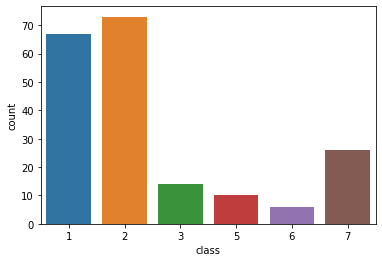

In [ ]:
sns.countplot(train["class"])

In [ ]:
train["class"].value_counts()

2    73
1    67
7    26
3    14
5    10
6     6
Name: class, dtype: int64

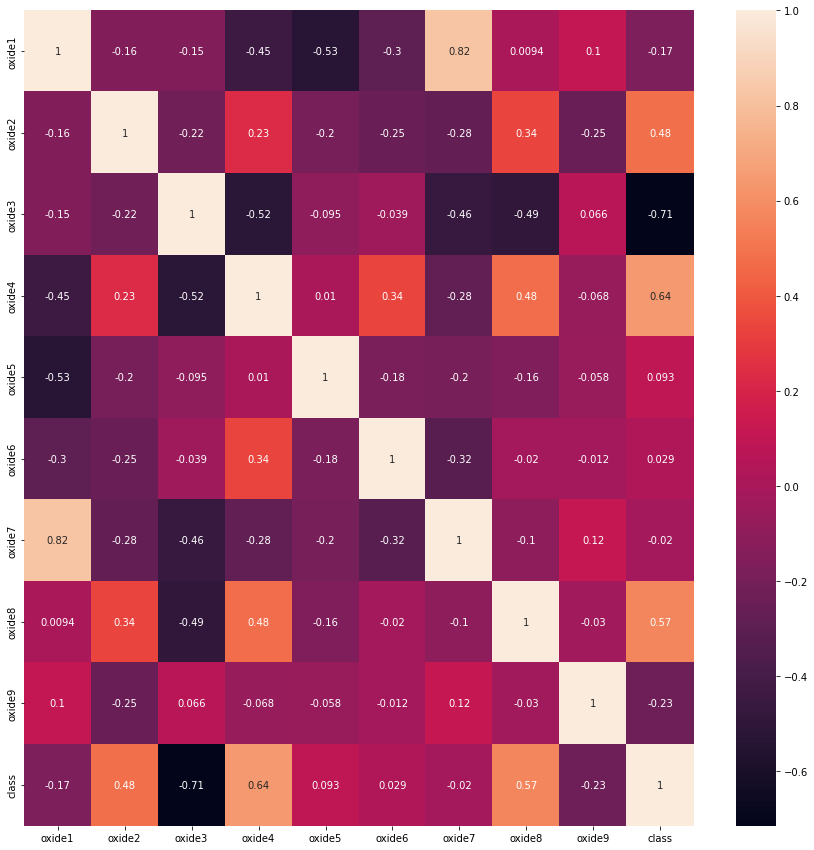

In [ ]:
corr=train.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)


In [ ]:
#dropping one feature from oxide 2 and 7 since they are highky correlated
train.drop(["oxide7"],axis=1,inplace=True)
test.drop(["oxide7"],axis=1,inplace=True)
print(train.head())


    oxide1  oxide2  oxide3  oxide4  oxide5  oxide6  oxide8  oxide9  class
0  1.52101   13.64    4.49    1.10   71.78    0.06     0.0     0.0      1
1  1.51761   13.89    3.60    1.36   72.73    0.48     0.0     0.0      1
2  1.51618   13.53    3.55    1.54   72.99    0.39     0.0     0.0      1
3  1.51766   13.21    3.69    1.29   72.61    0.57     0.0     0.0      1
4  1.51742   13.27    3.62    1.24   73.08    0.55     0.0     0.0      1


In [ ]:
x_train=train.iloc[:,:8]
y_train=train.iloc[:,-1:]
x_test=test.iloc[:,:8]
y_test=test.iloc[:,-1:]

In [ ]:
for i in range(1,11):
  knn = KNeighborsClassifier(i) 
  knn.fit(x_train,y_train) 
  print("K value  : " , i, "trainscore:",knn.score(x_train,y_train)," trainscore : ", np.mean(cross_val_score(knn, x_train, y_train, cv=6,scoring="accuracy")))

K value  :  1 trainscore: 1.0  trainscore :  0.6273674242424242
K value  :  2 trainscore: 0.8622448979591837  trainscore :  0.6223169191919192
K value  :  3 trainscore: 0.8214285714285714  trainscore :  0.6073232323232323
K value  :  4 trainscore: 0.7908163265306123  trainscore :  0.6068497474747474
K value  :  5 trainscore: 0.7806122448979592  trainscore :  0.6171085858585859
K value  :  6 trainscore: 0.7602040816326531  trainscore :  0.5812815656565656
K value  :  7 trainscore: 0.7346938775510204  trainscore :  0.6070075757575757
K value  :  8 trainscore: 0.7295918367346939  trainscore :  0.6019570707070706
K value  :  9 trainscore: 0.7142857142857143  trainscore :  0.5869633838383838
K value  :  10 trainscore: 0.6938775510204082  trainscore :  0.6073232323232323


In [ ]:
#manhattan
manh_knn=KNeighborsClassifier(n_neighbors=3,metric="manhattan")
manh_knn.fit(x_train,y_train)
manh_pred=manh_knn.predict(x_test)
print(classification_report(y_test,manh_pred))
print("ACCURACY:",accuracy_score(y_test,manh_pred))


              precision    recall  f1-score   support

           1       0.60      1.00      0.75         3
           2       0.40      0.67      0.50         3
           3       1.00      0.67      0.80         3
           5       1.00      0.67      0.80         3
           6       0.00      0.00      0.00         3
           7       0.75      1.00      0.86         3

    accuracy                           0.67        18
   macro avg       0.62      0.67      0.62        18
weighted avg       0.62      0.67      0.62        18

ACCURACY: 0.6666666666666666


In [ ]:
seq_knn=KNeighborsClassifier(n_neighbors=3,metric="sqeuclidean")
seq_knn.fit(x_train,y_train)
seq_pred=seq_knn.predict(x_test)
print(classification_report(y_test,seq_pred))
print("ACCURACY:",accuracy_score(y_test,seq_pred))
 

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         3
           2       0.33      0.33      0.33         3
           3       1.00      0.67      0.80         3
           5       1.00      0.67      0.80         3
           6       0.00      0.00      0.00         3
           7       0.60      1.00      0.75         3

    accuracy                           0.61        18
   macro avg       0.57      0.61      0.56        18
weighted avg       0.57      0.61      0.56        18

ACCURACY: 0.6111111111111112


From above two comparisons the ACCURACY of manhattan is more than squared euclidean distance,Therefore consider manhattan distance